### Covid-19 Live Data
<img src="qualitrolcorp.png" alt="covid-19_qualitrolcorp" width="500"/>

#### Slideshow Navigation

<a href="#/2/1">Import Libraries</a>

<a href="#/3/1">Quick Run - Top 10 Country View</a>

<a href="#/3/1">Quick Run - Country Breakdown (to 14Dec20)</a> <strong>DEPRECATED</strong>

<a href="#/5/1">Latest UK</a>

<a href="#/2/1">Latest UK-regions</a>  <strong>UNDER DEVELOPMENT</strong>

<a href="#/8/1">Quick Run - Country Breakdown (weekly from 14Dec20)</a>

<a href="#/10/1">UK Forecast - daily</a>

<a href="#/13/1">Country Forecast - weekly</a>

<a href="#/17/1">Quick Run - Global Regions</a>

#### Notebook Navigation

[Import Libraries](#Libraries)

[Quick Run - Top 10 Country View](#Top10)

[Quick Run - Country Breakdown (to 14Dec20)](#Countries_upto14Dec20)

[Latest UK-wide only](#LatestUK)

[Latest UK-regions](#LatestUKRegions)

[Quick Run - Country Breakdown (weekly from 14Dec20)](#Countries_from14Dec20)

[UK Forecast - daily](#UK_Forecast_daily)

[Country Forecast - weekly](#Forecast_weekly)

[Quick Run - Regional Breakdown](#Regions)

<a id='Libraries'></a>
### Libraries

In [45]:
import pandas as pd
from pandas import read_csv#
from pandas import to_datetime
from pandas import DataFrame

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#for dropdown widget 
from ipywidgets import widgets as wd 
from IPython.display import display

import datetime
import os 



from fbprophet import Prophet

<a id='Top10'></a>
### Quick Run - Top 10 Country View

<ipython-input-43-8deef9d00f09>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1, 1, 1)


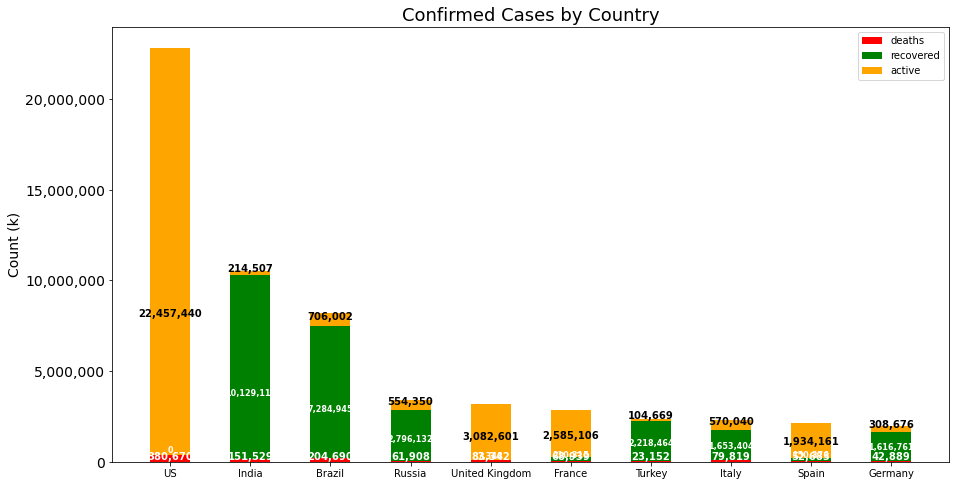

In [43]:
allData_to14Dec20 = pd.read_excel("https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx")

allData_from14Dec20 = pd.read_excel("https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/xlsx")

#and John Hopkins data

lastDataDate = datetime.date.strftime(datetime.date.today()- datetime.timedelta(1),"%m-%d-%Y")

enigma = pd.read_csv(os.path.join("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/", lastDataDate + ".csv"))


# Enigma / John Hopkins plot

#de-one hot encode by adding a single status column for deaths, recovered and active
enigmaReportCols = ["Deaths","Recovered","Active"]

meltedEnigma = enigma.melt(id_vars=enigma.drop(enigmaReportCols, axis=1), value_vars=enigmaReportCols, var_name=['Status'], value_name='Number') # Melting


#display as a grouped DF by country, sorted in descending order of confirmed cases 
meltedEnigmaSummary = meltedEnigma.groupby(['Country_Region','Status']).sum()
meltedEnigmaSummary.head()
meltedEnigmaSummary.shape
meltedEnigmaSummary=pd.DataFrame(meltedEnigmaSummary.to_records())
meltedEnigmaSummary = meltedEnigmaSummary.sort_values(['Confirmed'],ascending = False)
meltedEnigmaSummary=meltedEnigmaSummary.head(30)

#get top10 countries by confirmed cases
top10=meltedEnigmaSummary.head(30).Country_Region.unique()
top10
top10_enigma = enigma[enigma["Country_Region"].isin(top10)]
top10_enigma_stats=top10_enigma[["Country_Region","Deaths","Recovered","Active","Confirmed"]]
top10_enigma_stats=top10_enigma_stats.groupby("Country_Region").sum()
top10_enigma_stats=top10_enigma_stats.sort_values(['Confirmed'],ascending = False)

#make sure all data is integer for plotting below
top10_enigma_stats.Deaths  = top10_enigma_stats.Deaths.astype("int")
top10_enigma_stats.Recovered = top10_enigma_stats.Recovered.astype("int")
top10_enigma_stats.Active = top10_enigma_stats.Active.astype("int")
top10_enigma_stats.Confirmed = top10_enigma_stats.Confirmed.astype("int")

#see also this link for adding datatable below
#https://matplotlib.org/3.1.1/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

A = top10_enigma_stats.Deaths
B = top10_enigma_stats.Recovered
C = top10_enigma_stats.Active

fig = plt.figure(facecolor="white",figsize=(15,8))
plt.title("Confirmed Cases by Country", fontsize=18)

ax = fig.add_subplot(1, 1, 1)
bar_width = 0.5
bar_l = np.arange(1, 11)
tick_pos = [i-0.5 + bar_width for i in bar_l]

ax1 = ax.bar(bar_l, A, width=bar_width, label="deaths", color="red") #deaths
ax2 = ax.bar(bar_l, B, bottom=A, width=bar_width, label="recovered", color="green") #recovered
ax3 = ax.bar(bar_l, C, bottom=A+B, width=bar_width, label="active", color="orange") #active

ax.set_ylabel("Count (k)", fontsize=14)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#ax.set_xlabel("Country", fontsize=18)
ax.legend(loc="best")
plt.xticks(tick_pos, top10, fontsize=10)
plt.yticks(fontsize=14)

for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
#     plt.text(r1.get_x() + r1.get_width()-0.25  , 10 , "%d" % h1, ha="center", va="center", color="white", fontsize=10, fontweight="bold")
#     plt.text(r2.get_x() + r2.get_width()-0.25  , h1 + h2 / 3., "%d" % h2, ha="center", va="bottom", color="white", fontsize=10, fontweight="bold")
#     plt.text(r3.get_x() + r3.get_width() -0.25 , h1 + h2 + h3 / 3., "%d" % h3, ha="center", va="bottom", color="black", fontsize=10, fontweight="bold")

    plt.text(r1.get_x() + r1.get_width()-0.25  , 100 , f'{h1:,}', ha="center", va="bottom", color="white", fontsize=10, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width()-0.25  , h1 + h2 / 3., f'{h2:,}', ha="center", va="bottom", color="white", fontsize=8,fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() -0.25 , h1 + h2 + h3 / 3., f'{h3:,}', ha="center", va="bottom", color="black", fontsize=10, fontweight="bold")

                Deaths  Recovered    Active  Confirmed
Country_Region                                        
US              380670          0  22457440   22838110
India           151529   10129111    214507   10495147
Brazil          204690    7284945    706002    8195637
Russia           61908    2796132    554350    3412390
United Kingdom   83342       7348   3082601    3173291
France           68939     210315   2585106    2864360
Turkey           23152    2218464    104669    2346285
Italy            79819    1653404    570040    2303263
Spain            52683     150376   1934161    2137220
Germany          42889    1616761    308676    1968326


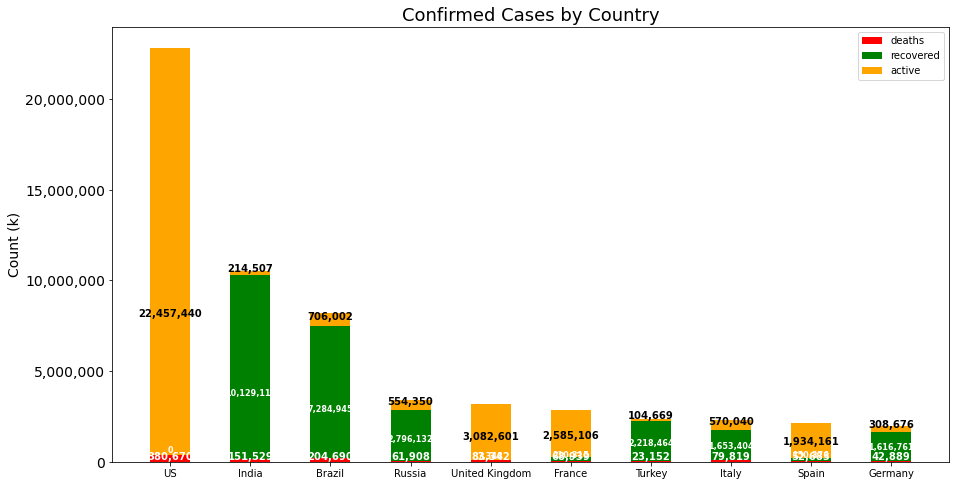

In [44]:
print(top10_enigma_stats)

fig

<a id='Countries_upto14Dec20'></a>
### Quick Run - Country Breakdown (to 14Dec20)

In [257]:
userOptions = wd.Dropdown(
        options=allData_to14Dec20.countriesAndTerritories.unique(),
        value='Afghanistan',
        description='Countries:',
        disabled=False
        )

display(userOptions)

Dropdown(description='Countries:', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguill…

In [263]:
userCountry =userOptions.value

filtered_df_to14Dec20 = allData_to14Dec20.loc[allData_to14Dec20['countriesAndTerritories'] == userCountry] #region filter

filtered_df_to14Dec20.head()

# Plotting

# config
from datetime import datetime as dt

plot_df_to14Dec20=filtered_df_to14Dec20 # copy just for plotting

#change to simpler date format, dont need year
plot_df_to14Dec20['dateRep'] = plot_df_to14Dec20['dateRep'].dt.strftime('%d-%b')
#sortindex in descending order so that x-axes moves eft to right from historic to present
plot_df_to14Dec20=plot_df_to14Dec20.sort_index(axis=0, ascending=False)
#set date as new index for plotting
plot_df_to14Dec20=plot_df_to14Dec20.set_index('dateRep')

x1 = plot_df_to14Dec20.index
x2 = plot_df_to14Dec20.index
y1 = plot_df_to14Dec20.cases.values #drop .values if doing a line plot (see next cell*)
y2 = plot_df_to14Dec20.deaths.values #drop .values if doing a line plot (see next cell*)

dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
dtype: object
dateRep                                                       

<ipython-input-263-6fd8b24562f9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_to14Dec20['dateRep'] = plot_df_to14Dec20['dateRep'].dt.strftime('%d-%b')


In [261]:
plot_df_to14Dec20.dtypes

day                                                             int64
month                                                           int64
year                                                            int64
cases                                                           int64
deaths                                                          int64
countriesAndTerritories                                        object
geoId                                                          object
countryterritoryCode                                           object
popData2019                                                   float64
continentExp                                                   object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    float64
dtype: object

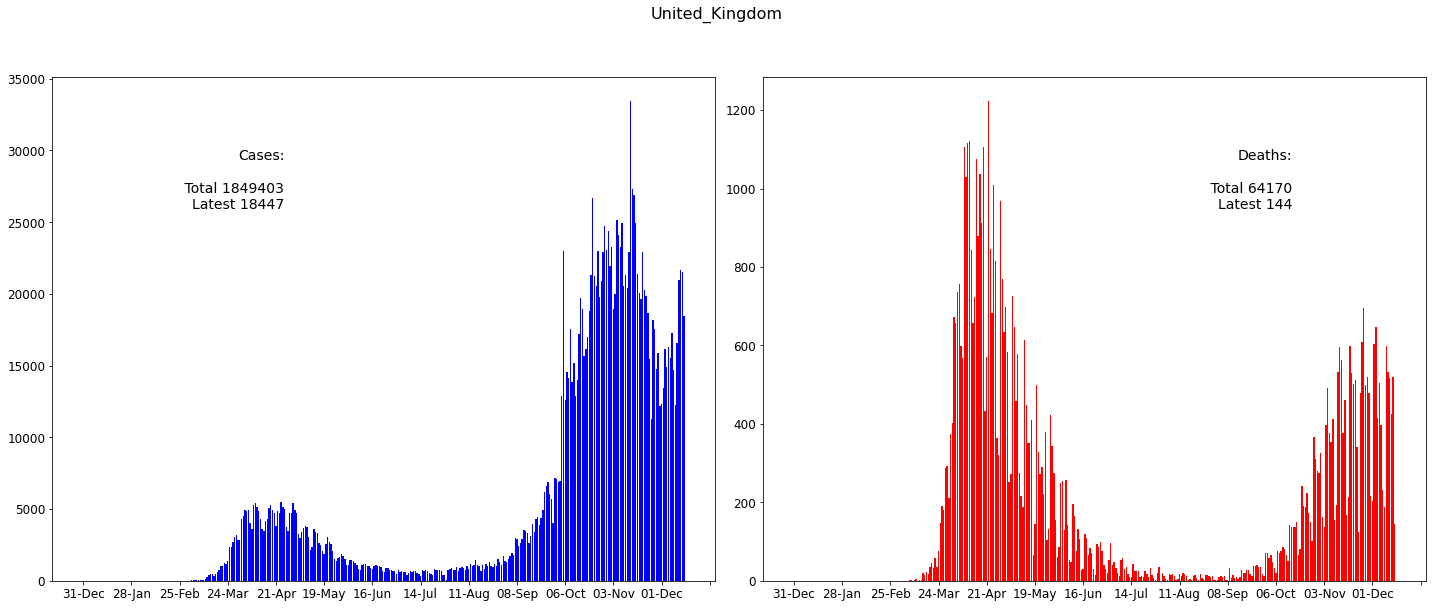

In [259]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].bar(x1, y1,color='b') #.plot would give a line plot*
axes[1].bar(x2, y2,color='r') #.plot would give a line plot*
axes[0].xaxis.set_major_locator(MultipleLocator(28))
axes[1].xaxis.set_major_locator(MultipleLocator(28))

axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=12)

#axes[0].set_title('Cases (latest: ' + str(plot_df["cases"][-1]) + ')')
#axes[1].set_title('Deaths (latest: ' + str(plot_df["deaths"][-1]) + ')')

fig.suptitle(userCountry, x= 0.5, y = 1.05, fontsize=16)
plt.figtext(0.2, 0.7, 'Cases:\n\n Total ' + str(plot_df_to14Dec20.cases.sum()) + '\nLatest ' + str(plot_df_to14Dec20["cases"][-1]), fontsize=14, horizontalalignment='right')
plt.figtext(0.9, 0.7, 'Deaths:\n\n Total ' + str(plot_df_to14Dec20.deaths.sum()) + '\nLatest ' + str(plot_df_to14Dec20["deaths"][-1]), fontsize=14, horizontalalignment='right')

fig.tight_layout()

<a id='LatestUK'></a>
### Latest UK

Exploratory Data Analysis

In [7]:
UKcases = pd.read_csv("https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesBySpecimenDate%22:%22newCasesBySpecimenDate%22,%22cumCasesBySpecimenDate%22:%22cumCasesBySpecimenDate%22%7D&format=csv")
UKcases.head()

,areaType,areaName,areaCode,date,newCasesBySpecimenDate,cumCasesBySpecimenDate
0,overview,United Kingdom,K02000001,2021-01-10,26287,3156726
1,overview,United Kingdom,K02000001,2021-01-09,33550,3130439
2,overview,United Kingdom,K02000001,2021-01-08,44997,3096889
3,overview,United Kingdom,K02000001,2021-01-07,50992,3051892
4,overview,United Kingdom,K02000001,2021-01-06,56838,3000900


In [8]:
UKdeaths = pd.read_csv("https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newDeaths28DaysByDeathDate%22:%22newDeaths28DaysByDeathDate%22,%22cumDeaths28DaysByDeathDate%22:%22cumDeaths28DaysByDeathDate%22%7D&format=csv")
UKdeaths.head()

,areaType,areaName,areaCode,date,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
0,overview,United Kingdom,K02000001,2021-01-10,563,82951.0
1,overview,United Kingdom,K02000001,2021-01-09,595,82388.0
2,overview,United Kingdom,K02000001,2021-01-08,682,81793.0
3,overview,United Kingdom,K02000001,2021-01-07,799,81111.0
4,overview,United Kingdom,K02000001,2021-01-06,799,80312.0


In [275]:
UKcases.dtypes

areaType                          object
areaName                          object
areaCode                          object
date                      datetime64[ns]
newCasesBySpecimenDate             int64
cumCasesBySpecimenDate             int64
dtype: object

In [274]:
UKdeaths.dtypes

areaType                       object
areaName                       object
areaCode                       object
date                           object
newDeaths28DaysByDeathDate      int64
cumDeaths28DaysByDeathDate    float64
dtype: object

In [36]:
UKcases = pd.read_csv("https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesBySpecimenDate%22:%22newCasesBySpecimenDate%22,%22cumCasesBySpecimenDate%22:%22cumCasesBySpecimenDate%22%7D&format=csv")
UKdeaths = pd.read_csv("https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newDeaths28DaysByDeathDate%22:%22newDeaths28DaysByDeathDate%22,%22cumDeaths28DaysByDeathDate%22:%22cumDeaths28DaysByDeathDate%22%7D&format=csv")

# Plotting

# config
from datetime import datetime as dt

# convert date object to datetime
UKcases.date = list(map(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"), UKcases.date ))
UKdeaths.date = list(map(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"), UKdeaths.date ))

#change to simpler date format, dont need year
UKcases['date'] = UKcases['date'].dt.strftime('%d-%b')
UKdeaths['date'] = UKdeaths['date'].dt.strftime('%d-%b')
#sortindex in descending order so that x-axes moves left to right from historic to present
UKcases=UKcases.sort_index(axis=0, ascending=False)
UKdeaths=UKdeaths.sort_index(axis=0, ascending=False)
#set date as new index for plotting
UKcases=UKcases.set_index('date')
UKdeaths=UKdeaths.set_index('date')

x1 = UKcases.index
x2 = UKdeaths.index
y1 = UKcases.newCasesBySpecimenDate.values #drop .values if doing a line plot (see next cell*)
y2 = UKdeaths.newDeaths28DaysByDeathDate.values #drop .values if doing a line plot (see next cell*)

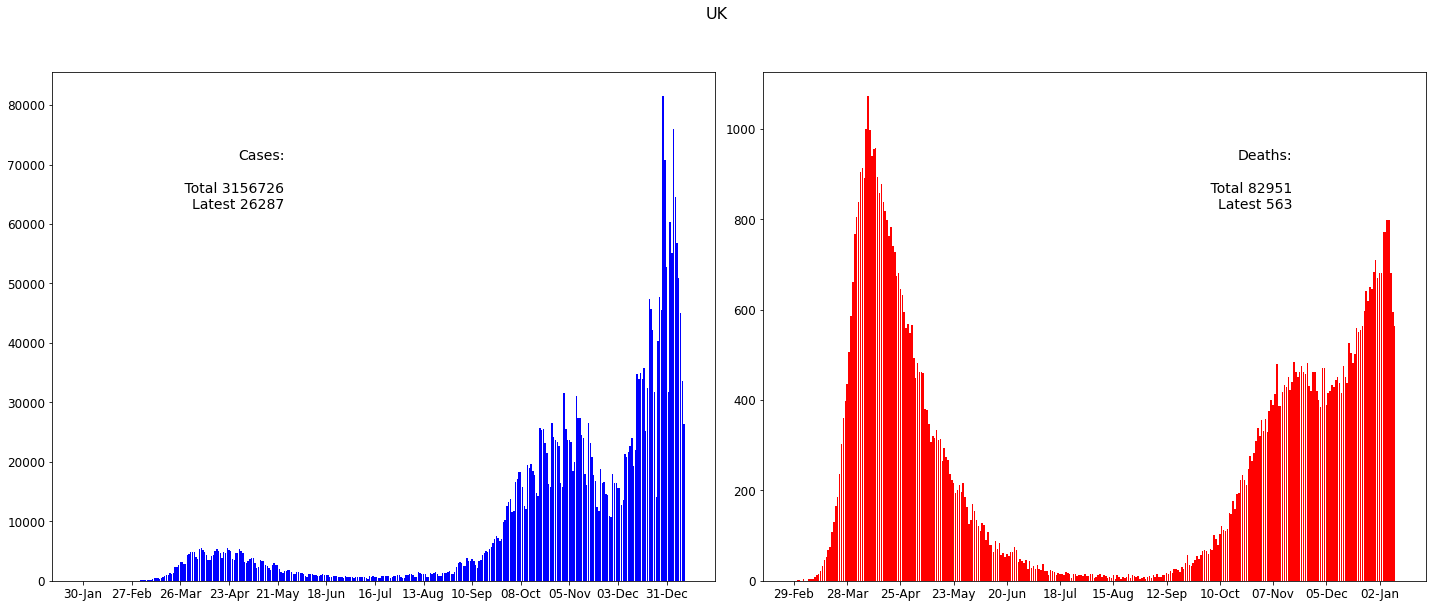

In [37]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].bar(x1, y1,color='b') #.plot would give a line plot*
axes[1].bar(x2, y2,color='r') #.plot would give a line plot*
axes[0].xaxis.set_major_locator(MultipleLocator(28))
axes[1].xaxis.set_major_locator(MultipleLocator(28))

axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=12)

#axes[0].set_title('Cases (latest: ' + str(plot_df["cases"][-1]) + ')')
#axes[1].set_title('Deaths (latest: ' + str(plot_df["deaths"][-1]) + ')')

fig.suptitle("UK", x= 0.5, y = 1.05, fontsize=16)
plt.figtext(0.2, 0.7, 'Cases:\n\n Total ' + str(UKcases.newCasesBySpecimenDate.sum()) + '\nLatest ' + str(UKcases.newCasesBySpecimenDate[-1]), fontsize=14, horizontalalignment='right')
plt.figtext(0.9, 0.7, 'Deaths:\n\n Total ' + str(UKdeaths.newDeaths28DaysByDeathDate.sum()) + '\nLatest ' + str(UKdeaths.newDeaths28DaysByDeathDate[-1]), fontsize=14, horizontalalignment='right')

fig.tight_layout()

<a id='LatestUKRegions'></a>
### Latest UK-regions

In [290]:
UKregions_cases = pd.read_csv("https://developertools.esd.org.uk/csv?dataUrl=https%3A%2F%2Fwebservices.esd.org.uk%2Fdata%3Fvalue.valueType%3Draw%26metricType%3D13226%252C13227%252C13368%252C13369%26area%3DE92000001%252CAllRegions_England%252CAllLaInCountry_England%26period%3Dlatest%253A30%26query2.value.valueType%3Draw%26query2.virtualMetricType.numerator%3D13226%26query2.virtualMetricType.denominator%3D3281%26query2.virtualMetricType.multiple%3D100000.0%26query2.virtualMetricType.label%3DDaily%2520lab-confirmed%2520cases%2520of%2520COVID-19%2520per%2520100%26query2.virtualMetricType.identifier%3D13226%252F3281*100000.0%26query2.virtualMetricType.type%3DvirtualMetricType%26query3.value.valueType%3Draw%26query3.virtualMetricType.numerator%3D13227%26query3.virtualMetricType.denominator%3D3281%26query3.virtualMetricType.multiple%3D100000.0%26query3.virtualMetricType.label%3DCumulative%2520lab-confirmed%2520cases%2520of%2520COVID-19%2520per%2520100%26query3.virtualMetricType.identifier%3D13227%252F3281*100000.0%26query3.virtualMetricType.type%3DvirtualMetricType%26query4.value.valueType%3Draw%26query4.virtualMetricType.numerator%3D13368%26query4.virtualMetricType.denominator%3D3281%26query4.virtualMetricType.multiple%3D100000.0%26query4.virtualMetricType.label%3DDaily%2520COVID-19%2520associated%2520deaths%2520per%2520100%26query4.virtualMetricType.identifier%3D13368%252F3281*100000.0%26query4.virtualMetricType.type%3DvirtualMetricType%26query5.value.valueType%3Draw%26query5.virtualMetricType.numerator%3D13369%26query5.virtualMetricType.denominator%3D3281%26query5.virtualMetricType.multiple%3D100000.0%26query5.virtualMetricType.label%3DCumulative%2520COVID-19%2520associated%2520deaths%2520per%2520100%26query5.virtualMetricType.identifier%3D13369%252F3281*100000.0%26query5.virtualMetricType.type%3DvirtualMetricType%26columnGrouping%3DmetricType%26columnGrouping%3Dperiod%26rowGrouping%3Darea%26ApplicationKey%3DExamplePPK%26Signature%3DtNu9Wu55TNlZy9jS2tPGNRV18DU%3D")
UKregions_cases.head()

,Unnamed: 0,Unnamed: 1,"Daily cases of COVID-19 by specimen date, total confirmed","Daily cases of COVID-19 by specimen date, total confirmed.1","Daily cases of COVID-19 by specimen date, total confirmed.2","Daily cases of COVID-19 by specimen date, total confirmed.3","Daily cases of COVID-19 by specimen date, total confirmed.4","Daily cases of COVID-19 by specimen date, total confirmed.5","Daily cases of COVID-19 by specimen date, total confirmed.6","Daily cases of COVID-19 by specimen date, total confirmed.7",...,Cumulative COVID-19 associated deaths per 100.20,Cumulative COVID-19 associated deaths per 100.21,Cumulative COVID-19 associated deaths per 100.22,Cumulative COVID-19 associated deaths per 100.23,Cumulative COVID-19 associated deaths per 100.24,Cumulative COVID-19 associated deaths per 100.25,Cumulative COVID-19 associated deaths per 100.26,Cumulative COVID-19 associated deaths per 100.27,Cumulative COVID-19 associated deaths per 100.28,Cumulative COVID-19 associated deaths per 100.29
0,NaN,NaN,13226,13226,13226,13226,13226,13226,13226,13226,...,13369/3281*100000.0,13369/3281*100000.0,13369/3281*100000.0,13369/3281*100000.0,13369/3281*100000.0,13369/3281*100000.0,13369/3281*100000.0,13369/3281*100000.0,13369/3281*100000.0,13369/3281*100000.0
1,NaN,NaN,02/12/2020,03/12/2020,04/12/2020,05/12/2020,06/12/2020,07/12/2020,08/12/2020,09/12/2020,...,22/12/2020,23/12/2020,24/12/2020,25/12/2020,26/12/2020,27/12/2020,28/12/2020,29/12/2020,30/12/2020,31/12/2020
2,NaN,NaN,daily_2020_12_02,daily_2020_12_03,daily_2020_12_04,daily_2020_12_05,daily_2020_12_06,daily_2020_12_07,daily_2020_12_08,daily_2020_12_09,...,daily_2020_12_22,daily_2020_12_23,daily_2020_12_24,daily_2020_12_25,daily_2020_12_26,daily_2020_12_27,daily_2020_12_28,daily_2020_12_29,daily_2020_12_30,daily_2020_12_31
3,NaN,NaN,Raw value,Raw value,Raw value,Raw value,Raw value,Raw value,Raw value,Raw value,...,Count (per 100000 people),Count (per 100000 people),Count (per 100000 people),Count (per 100000 people),Count (per 100000 people),Count (per 100000 people),Count (per 100000 people),Count (per 100000 people),Count (per 100000 people),Count (per 100000 people)
4,NaN,NaN,raw,raw,raw,raw,raw,raw,raw,raw,...,raw,raw,raw,raw,raw,raw,raw,raw,raw,raw


In [299]:
UKregions_deaths = pd.read_excel("https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2021/01/COVID-19-total-announced-deaths-1-January-2021.xlsx", sheet_name = "Tab1 Deaths by region", header = 15)
UKregions_deaths

,Unnamed: 0,NHS England Region,Unnamed: 2,Up to 01-Mar-20,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,...,2020-12-26 00:00:00,2020-12-27 00:00:00,2020-12-28 00:00:00,2020-12-29 00:00:00,2020-12-30 00:00:00,2020-12-31 00:00:00,Unnamed: 310,Awaiting verification,Unnamed: 312,Total
0,NaN,England,NaN,0.0,0.0,1.0,2.0,0.0,2.0,2.0,...,372.0,371.0,352.0,336.0,237.0,42.0,NaN,0.0,NaN,50668
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,East Of England,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,47.0,37.0,49.0,34.0,38.0,2.0,NaN,0.0,NaN,5110
3,NaN,London,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,70.0,75.0,64.0,70.0,38.0,6.0,NaN,0.0,NaN,8393
4,NaN,Midlands,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,61.0,76.0,57.0,66.0,45.0,9.0,NaN,0.0,NaN,10645
5,NaN,North East And Yorkshire,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,63.0,59.0,54.0,49.0,30.0,9.0,NaN,0.0,NaN,8823
6,NaN,North West,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,54.0,46.0,42.0,37.0,35.0,10.0,NaN,0.0,NaN,9626
7,NaN,South East,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,58.0,60.0,70.0,64.0,43.0,3.0,NaN,0.0,NaN,5728
8,NaN,South West,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,18.0,16.0,16.0,8.0,3.0,NaN,0.0,NaN,2343


<a id='LatestUKHealthcare'></a>
### Latest UK-healthcare

In [285]:
UKhealthcare = pd.read_csv("https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newAdmissions%22:%22newAdmissions%22,%22cumAdmissions%22:%22cumAdmissions%22%7D&format=csv")
UKhealthcare.head()

,areaType,areaName,areaCode,date,newAdmissions,cumAdmissions
0,overview,United Kingdom,K02000001,2020-12-22,2434,262668
1,overview,United Kingdom,K02000001,2020-12-21,2332,260234
2,overview,United Kingdom,K02000001,2020-12-20,2149,257902
3,overview,United Kingdom,K02000001,2020-12-19,2015,255753
4,overview,United Kingdom,K02000001,2020-12-18,1897,253738


<a id='LatestUKTesting'></a>
### Latest UK-testing

In [287]:
UKtesting = pd.read_csv("https://coronavirus.data.gov.uk/api/v1/data?filters=areaName=United%2520Kingdom;areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newVirusTests%22:%22newVirusTests%22,%22cumVirusTests%22:%22cumVirusTests%22%7D&format=csv")
UKtesting.head()

,areaType,areaName,areaCode,date,newVirusTests,cumVirusTests
0,overview,United Kingdom,K02000001,2020-12-30,420492.0,52058247
1,overview,United Kingdom,K02000001,2020-12-29,344775.0,51635380
2,overview,United Kingdom,K02000001,2020-12-28,357238.0,51289157
3,overview,United Kingdom,K02000001,2020-12-27,352702.0,50931123
4,overview,United Kingdom,K02000001,2020-12-26,269876.0,50509650


<a id='Countries_from14Dec20'></a>
### Quick Run - Country Breakdown (weekly from 14Dec20)

first explore the data

In [7]:
allData_from14Dec20.head()

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
0,Afghanistan,AFG,Asia,38928341,cases,0,2020-01,NaN,0,"Epidemic intelligence, national weekly data"
1,Afghanistan,AFG,Asia,38928341,cases,0,2020-02,0.0,0,"Epidemic intelligence, national weekly data"
2,Afghanistan,AFG,Asia,38928341,cases,0,2020-03,0.0,0,"Epidemic intelligence, national weekly data"
3,Afghanistan,AFG,Asia,38928341,cases,0,2020-04,0.0,0,"Epidemic intelligence, national weekly data"
4,Afghanistan,AFG,Asia,38928341,cases,0,2020-05,0.0,0,"Epidemic intelligence, national weekly data"


In [15]:
# check unique enrries in indicator column
allData_from14Dec20.indicator.unique()

array(['cases', 'deaths'], dtype=object)

In [28]:
# isolate cases and deaths in separate columns

allData_from14Dec20.pivot(index=['country', 'year_week'], columns='indicator', values='rate_14_day').reset_index()

indicator,country,year_week,cases,deaths
0,Afghanistan,2020-01,NaN,NaN
1,Afghanistan,2020-02,0.0,0.0
2,Afghanistan,2020-03,0.0,0.0
3,Afghanistan,2020-04,0.0,0.0
4,Afghanistan,2020-05,0.0,0.0
...,...,...,...,...
9662,the Holy See/ Vatican City State,2020-48,0.0,0.0
9663,the Holy See/ Vatican City State,2020-49,0.0,0.0
9664,the Holy See/ Vatican City State,2020-50,0.0,0.0
9665,the Holy See/ Vatican City State,2020-51,0.0,0.0


In [37]:
allData_from14Dec20.loc[allData_from14Dec20['country'] == "United Kingdom"]

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
18342,United Kingdom,GBR,Europe,66647112,cases,0,2020-01,NaN,0,"Epidemic intelligence, national weekly data"
18343,United Kingdom,GBR,Europe,66647112,cases,0,2020-02,0.000000,0,"Epidemic intelligence, national weekly data"
18344,United Kingdom,GBR,Europe,66647112,cases,0,2020-03,0.000000,0,"Epidemic intelligence, national weekly data"
18345,United Kingdom,GBR,Europe,66647112,cases,0,2020-04,0.000000,0,"Epidemic intelligence, national weekly data"
18346,United Kingdom,GBR,Europe,66647112,cases,2,2020-05,0.003001,2,"Epidemic intelligence, national weekly data"
...,...,...,...,...,...,...,...,...,...,...
18441,United Kingdom,GBR,Europe,66647112,deaths,3494,2020-48,94.692775,58245,"Epidemic intelligence, national weekly data"
18442,United Kingdom,GBR,Europe,66647112,deaths,3000,2020-49,97.438581,61245,"Epidemic intelligence, national weekly data"
18443,United Kingdom,GBR,Europe,66647112,deaths,2925,2020-50,88.901076,64170,"Epidemic intelligence, national weekly data"
18444,United Kingdom,GBR,Europe,66647112,deaths,3231,2020-51,92.367093,67401,"Epidemic intelligence, national weekly data"


In [14]:
allData_from14Dec20 = pd.read_excel("https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/xlsx")

userOptions = wd.Dropdown(
        options=allData_from14Dec20.country.unique(),
        value='Afghanistan',
        description='Countries:',
        disabled=False
        )

display(userOptions)

Dropdown(description='Countries:', options=('Afghanistan', 'Africa (total)', 'Albania', 'Algeria', 'America (t…

In [15]:
userCountry =userOptions.value

filtered_df_from14Dec20 = allData_from14Dec20.loc[allData_from14Dec20['country'] == userCountry] #region filter

filtered_df_from14Dec20.head()

# Plotting

# config
from datetime import datetime as dt

# pivot so that cases and deaths in unique columns for plotting below
plot_df_from14Dec20=filtered_df_from14Dec20.pivot(index=['country', 'year_week'], columns='indicator', values='weekly_count').reset_index()

In [16]:
plot_df_from14Dec20.tail()

indicator,country,year_week,cases,deaths
48,Spain,2020-49,54141,1577
49,Spain,2020-50,49556,1367
50,Spain,2020-51,67365,1247
51,Spain,2020-52,60164,862
52,Spain,2020-53,79431,956


In [17]:
#change to simpler date format, dont need year
#plot_df['year_week'] = plot_df['year_week'].dt.strftime('%d-%b')
#sortindex in descending order so that x-axes moves left to right from historic to present
#plot_df=plot_df.sort_index(axis=0, ascending=False)
#set date as new index for plotting
plot_df_from14Dec20=plot_df_from14Dec20.set_index('year_week')

x1 = plot_df_from14Dec20.index
x2 = plot_df_from14Dec20.index
y1 = plot_df_from14Dec20.cases.values #drop .values if doing a line plot (see next cell*)
y2 = plot_df_from14Dec20.deaths.values #drop .values if doing a line plot (see next cell*)

In [18]:
plot_df_from14Dec20.columns

Index(['country', 'cases', 'deaths'], dtype='object', name='indicator')

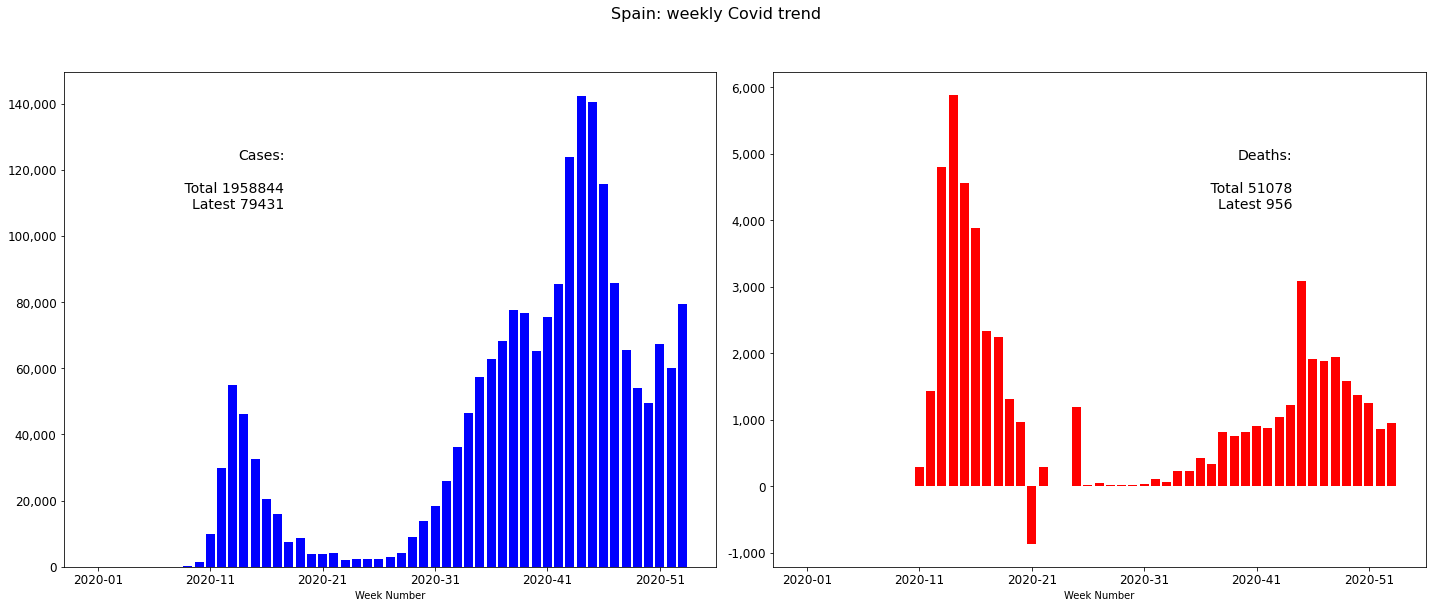

In [33]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].bar(x1, y1,color='b') #.plot would give a line plot*
axes[1].bar(x2, y2,color='r') #.plot would give a line plot*
axes[0].xaxis.set_major_locator(MultipleLocator(10))
axes[1].xaxis.set_major_locator(MultipleLocator(10))

axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=12)

axes[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
axes[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# check also below link to convert week number to date
# https://stackoverflow.com/questions/17087314/get-date-from-week-number

#axes[0].set_title('Cases (latest: ' + str(plot_df["cases"][-1]) + ')')
#axes[1].set_title('Deaths (latest: ' + str(plot_df["deaths"][-1]) + ')')

fig.suptitle(userCountry + ": weekly Covid trend", x= 0.5, y = 1.05, fontsize=16)
axes[0].set_xlabel("Week Number")
axes[1].set_xlabel("Week Number")
plt.figtext(0.2, 0.7, 'Cases:\n\n Total ' + str(round(plot_df_from14Dec20.cases.sum())) + '\nLatest ' + str(round(plot_df_from14Dec20["cases"][-1])), fontsize=14, horizontalalignment='right')
plt.figtext(0.9, 0.7, 'Deaths:\n\n Total ' + str(round(plot_df_from14Dec20.deaths.sum())) + '\nLatest ' + str(round(plot_df_from14Dec20["deaths"][-1])), fontsize=14, horizontalalignment='right')

fig.tight_layout()

<a id='UK_Forecast_daily'></a>
### UK Forecast - daily

In [ ]:
#one off install
#!conda install -c conda-forge fbprophet -y

Reference for below:
https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [ ]:
# cross-validation - used for hyperparameter tuning below

# Python
import itertools
import numpy as np
import pandas as pd

from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, initial='56 days', period='28 days', horizon = '28 days',parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

          ds        yhat  yhat_lower  yhat_upper
0 2020-01-01  712.133291  667.006108  752.569645
1 2020-01-02  714.055462  673.713486  754.915665
2 2020-01-03  706.994394  664.337955  751.777454
3 2020-01-04  705.976811  665.646728  749.919858
4 2020-01-05  697.911952  656.343019  736.299833


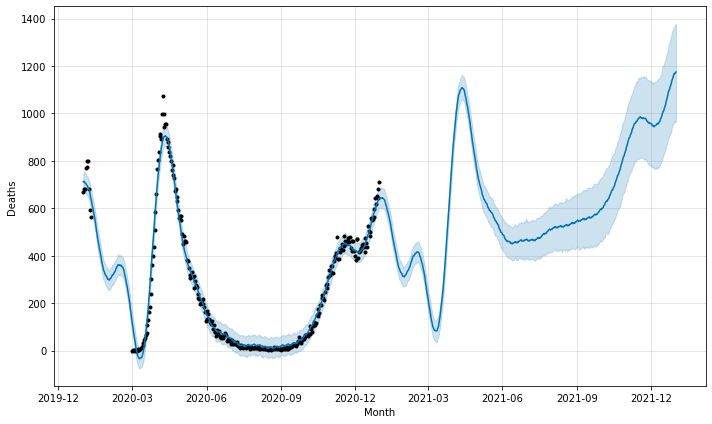

In [41]:
# make an in-sample forecast
from pandas import read_csv#
import datetime
from pandas import to_datetime
from pandas import DataFrame


from fbprophet import Prophet


#df=plot_df["deaths"]
df=UKdeaths.newDeaths28DaysByDeathDate

df = df.iloc[1:] #ignore first row as starts from 31 Dec 2019
df=df.reset_index()
# prepare expected column names
df.columns = ['ds', 'y']

df['ds']= pd.to_datetime(df['ds'], format='%d-%b', errors='coerce') # we need to coerce erros as Feb 29th throws and error
df=df.dropna() # we just drop Feb 29th from plot as not really required

df['ds'] = df['ds'] + pd.DateOffset(years=120) # finally have to change default year of 1900

# define the model
#hyperparameters chosen from cross validation run below
model = Prophet(yearly_seasonality=True, daily_seasonality=True, changepoint_prior_scale=0.01,seasonality_prior_scale=0.01,)
# fit the model
model.fit(df)

# define the period for which we want a prediction
future = list()
for i in range(0, 366+365+1):
    date = datetime.datetime(2020, 1, 1)
    date += datetime.timedelta(days=i)
    #date = '2020-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)

plt.xlabel("Month")
plt.ylabel("Deaths")

plt.show()

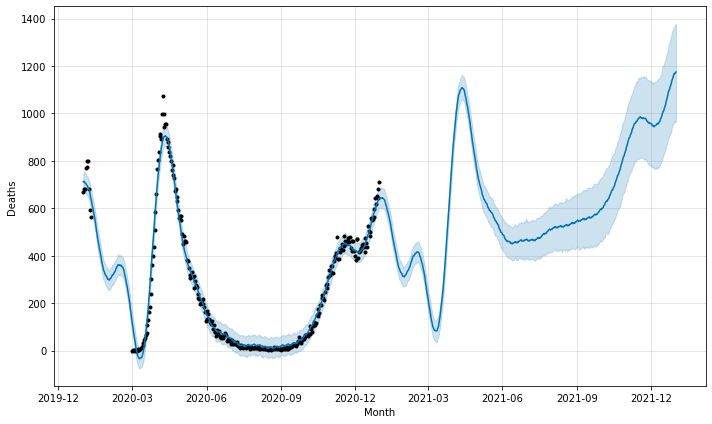

In [42]:
model.plot(forecast)

plt.xlabel("Month")
plt.ylabel("Deaths")

plt.show()

<a id='Forecast_weekly'></a>
### Country Forecast - weekly

In [46]:
# make an in-sample forecast

df=plot_df_from14Dec20["deaths"]

df=df.reset_index()
# prepare expected column names
df.columns = ['ds', 'y']

          ds        yhat  yhat_lower  yhat_upper
0 2020-01-01 -311.572064 -695.638208   75.160442
1 2020-01-02 -282.441060 -681.858517   82.463453
2 2020-01-03 -251.158718 -652.959477  177.901074
3 2020-01-04 -218.838855 -632.782947  149.738358
4 2020-01-05 -186.627140 -552.823027  193.307789


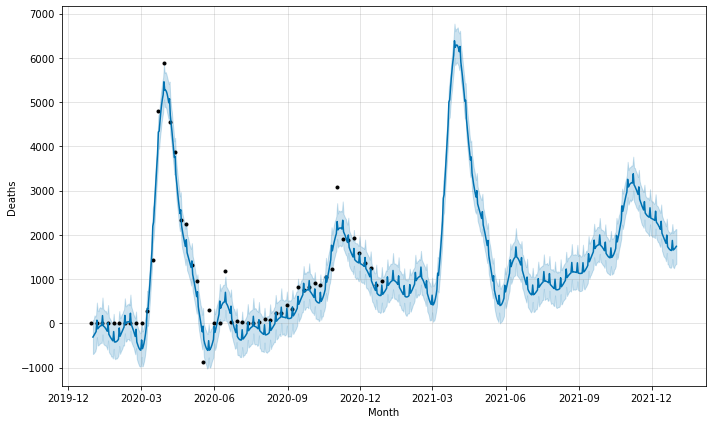

In [47]:
# add on "-1" to date for week number conversion below to work
df['ds'] = df['ds'] + '-1'

df['ds'] = list(map(lambda x: datetime.datetime.strptime(x,'%G-%V-%u'), df['ds'] ))

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
# fit the model
model.fit(df)

# define the period for which we want a prediction
future = list()
for i in range(0, 366+365+1):
    date = datetime.datetime(2020, 1, 1)
    date += datetime.timedelta(days=i)
    #date = '2020-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)

plt.xlabel("Month")
plt.ylabel("Deaths")

plt.show()

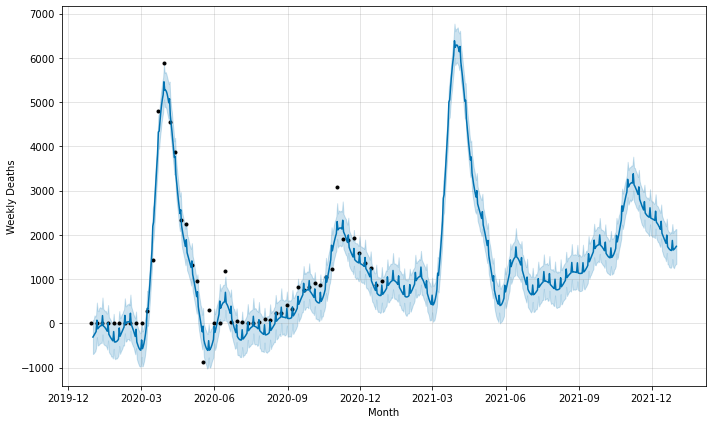

In [48]:
model.plot(forecast)

plt.xlabel("Month")
plt.ylabel("Weekly Deaths")

plt.show()

<a id='Regions'></a>
### Quick Run - Regional Breakdown

In [49]:
#import live data
US_Confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
Global_Confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
US_Deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")
Global_Deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
Global_Recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

#we just want state break down so aggregate
US_Confirmed = US_Confirmed.groupby('Province_State', as_index=False).sum() 
US_Deaths = US_Deaths.groupby('Province_State', as_index=False).sum() 
Global_Confirmed = Global_Confirmed.groupby('Province/State', as_index=False).sum() 
Global_Deaths = Global_Deaths.groupby('Province/State', as_index=False).sum() 
Global_Recovered = Global_Recovered.groupby('Province/State', as_index=False).sum() 

#Simplify and combine datasets for plotting

#drop all columns except region and dates
US_Confirmed = US_Confirmed.drop(columns=['UID', 'code3', 'FIPS', 'Lat', 'Long_'])
US_Deaths = US_Deaths.drop(columns=['UID', 'code3', 'FIPS', 'Lat', 'Long_', 'Population'])
Global_Confirmed = Global_Confirmed.drop(columns=['Lat','Long'])
Global_Deaths = Global_Deaths.drop(columns=['Lat','Long'])
Global_Recovered = Global_Recovered.drop(columns=['Lat','Long'])


#put dates in long format, not wide
US_Confirmed = US_Confirmed.melt(id_vars="Province_State",var_name="Date",value_name="Confirmed")
US_Deaths = US_Deaths.melt(id_vars="Province_State",var_name="Date",value_name="Deaths")
Global_Confirmed = Global_Confirmed.melt(id_vars="Province/State",var_name="Date",value_name="Confirmed")
Global_Deaths = Global_Deaths.melt(id_vars="Province/State",var_name="Date",value_name="Deaths")
Global_Recovered = Global_Recovered.melt(id_vars="Province/State",var_name="Date",value_name="Recovered")


# Join US Confirmed to Deaths
US_all = US_Confirmed.merge(US_Deaths, on=['Province_State','Date'])
Global_all = Global_Confirmed.merge(Global_Deaths, on=['Province/State','Date'])
#and join with global recoveries
Global_all = Global_all.merge(Global_Recovered, on=['Province/State','Date'])
#rename column
Global_all = Global_all.rename(columns={"Province/State": "Province_State"})

#final dataset for plotting
all = US_all.append(Global_all)

In [50]:
#user prompt for regions

userOptionsRegion = wd.Dropdown(
        options=all.Province_State.unique(),
        value='American Samoa',
        description='Regions:',
        disabled=False
        )

display(userOptionsRegion)

Dropdown(description='Regions:', index=2, options=('Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas…

In [51]:
userRegion =userOptionsRegion.value

filtered = all.loc[all['Province_State'] == userRegion] #region filter

# need to change Date to datetime
filtered["Date"] = pd.to_datetime(filtered["Date"])

# take the differences from one day to the next to get back to daily totals
filtered.Confirmed=filtered.Confirmed.diff()
filtered.Deaths=filtered.Deaths.diff()
filtered.Recovered=filtered.Recovered.diff()

from datetime import datetime as dt

#change to simpler date format, dont need year
filtered['Date'] = filtered['Date'].dt.strftime('%d-%b')

#set date as new index for plotting
filtered=filtered.set_index('Date')

x1 = filtered.index
x2 = filtered.index
y1 = filtered.Confirmed.values #drop .values if doing a line plot (see next cell*)
y2 = filtered.Deaths.values #drop .values if doing a line plot (see next cell*)

<ipython-input-51-4b6b661f1afd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["Date"] = pd.to_datetime(filtered["Date"])
C:\Users\bwals\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-51-4b6b661f1afd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

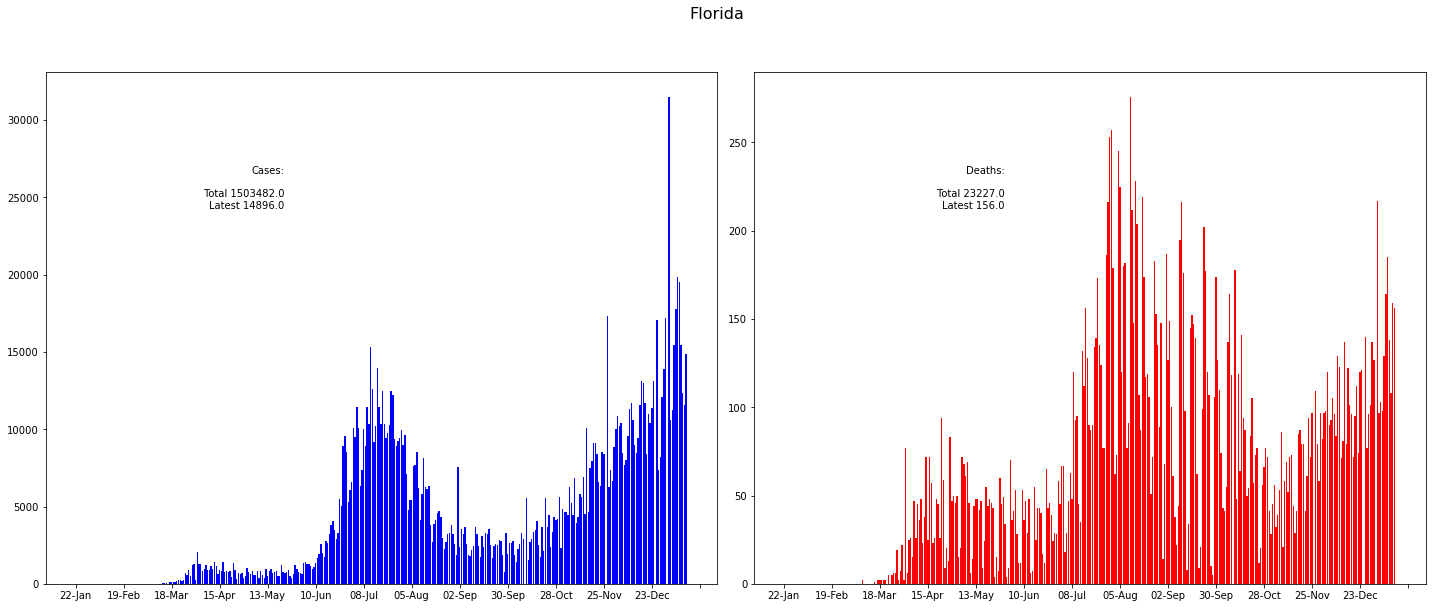

In [53]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].bar(x1, y1,color='b') #.plot would give a line plot*
axes[1].bar(x2, y2,color='r') #.plot would give a line plot*
axes[0].xaxis.set_major_locator(MultipleLocator(28))
axes[1].xaxis.set_major_locator(MultipleLocator(28))

fig.suptitle(userRegion, x= 0.5, y = 1.05, fontsize=16)
plt.figtext(0.2, 0.7, 'Cases:\n\n Total ' + str(filtered.Confirmed.sum()) + '\nLatest ' + str(filtered["Confirmed"][-1]), horizontalalignment='right')
plt.figtext(0.7, 0.7, 'Deaths:\n\n Total ' + str(filtered.Deaths.sum()) + '\nLatest ' + str(filtered["Deaths"][-1]), horizontalalignment='right')

fig.tight_layout()

## Full Run - Top 10 Country View

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#for dropdown widget 
from ipywidgets import widgets as wd 
from IPython.display import display

import datetime
import os 

allData = pd.read_excel("https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx")

allData.head()

#and John Hopkins data

lastDataDate = datetime.date.strftime(datetime.date.today()- datetime.timedelta(1),"%m-%d-%Y")

enigma = pd.read_csv(os.path.join("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/", lastDataDate + ".csv"))

### Enigma / John Hopkins University data exploration

In [ ]:
enigma.head()

In [ ]:
enigma.tail()

In [ ]:
enigma.shape

In [ ]:
enigma.nunique()

In [ ]:
enigma.Country_Region.unique()

In [ ]:
enigma.Province_State.unique()

### Enigma / John Hopkins plot

In [ ]:
#de-one hot encode by adding a single status column for deaths, recovered and active
enigmaReportCols = ["Deaths","Recovered","Active"]

meltedEnigma = enigma.melt(id_vars=enigma.drop(enigmaReportCols, axis=1), value_vars=enigmaReportCols, var_name=['Status'], value_name='Number') # Melting

In [ ]:
meltedEnigma.head()

In [ ]:
meltedEnigma.shape

In [ ]:
#display as a grouped DF by country, sorted in descending order of confirmed cases 
meltedEnigmaSummary = meltedEnigma.groupby(['Country_Region','Status']).sum()
meltedEnigmaSummary.head()
meltedEnigmaSummary.shape
meltedEnigmaSummary=pd.DataFrame(meltedEnigmaSummary.to_records())
meltedEnigmaSummary = meltedEnigmaSummary.sort_values(['Confirmed'],ascending = False)
meltedEnigmaSummary=meltedEnigmaSummary.head(30)

#get top10 countries by confirmed cases
top10=meltedEnigmaSummary.head(30).Country_Region.unique()
top10
top10_enigma = enigma[enigma["Country_Region"].isin(top10)]
top10_enigma_stats=top10_enigma[["Country_Region","Deaths","Recovered","Active","Confirmed"]]
top10_enigma_stats=top10_enigma_stats.groupby("Country_Region").sum()
top10_enigma_stats=top10_enigma_stats.sort_values(['Confirmed'],ascending = False)

In [ ]:
#see also this link for adding datatable below
#https://matplotlib.org/3.1.1/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

A = top10_enigma_stats.Deaths
B = top10_enigma_stats.Recovered
C = top10_enigma_stats.Active

fig = plt.figure(facecolor="white",figsize=(15,8))
plt.title("Confirmed Cases by Country", fontsize=18)

ax = fig.add_subplot(1, 1, 1)
bar_width = 0.5
bar_l = np.arange(1, 11)
tick_pos = [i-0.5 + bar_width for i in bar_l]

ax1 = ax.bar(bar_l, A, width=bar_width, label="deaths", color="red") #deaths
ax2 = ax.bar(bar_l, B, bottom=A, width=bar_width, label="recovered", color="green") #recovered
ax3 = ax.bar(bar_l, C, bottom=A+B, width=bar_width, label="active", color="orange") #active

ax.set_ylabel("Count (k)", fontsize=14)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#ax.set_xlabel("Country", fontsize=18)
ax.legend(loc="best")
plt.xticks(tick_pos, top10, fontsize=10)
plt.yticks(fontsize=14)

for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
#     plt.text(r1.get_x() + r1.get_width()-0.25  , 10 , "%d" % h1, ha="center", va="center", color="white", fontsize=10, fontweight="bold")
#     plt.text(r2.get_x() + r2.get_width()-0.25  , h1 + h2 / 3., "%d" % h2, ha="center", va="bottom", color="white", fontsize=10, fontweight="bold")
#     plt.text(r3.get_x() + r3.get_width() -0.25 , h1 + h2 + h3 / 3., "%d" % h3, ha="center", va="bottom", color="black", fontsize=10, fontweight="bold")

    plt.text(r1.get_x() + r1.get_width()-0.25  , 100 , f'{h1:,}', ha="center", va="bottom", color="white", fontsize=10, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width()-0.25  , h1 + h2 / 3., f'{h2:,}', ha="center", va="bottom", color="white", fontsize=10,fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() -0.25 , h1 + h2 + h3 / 3., f'{h3:,}', ha="center", va="bottom", color="black", fontsize=10, fontweight="bold")

In [ ]:
fig

In [ ]:
top10_enigma_stats

### Filter by Country

In [ ]:
#alternative

# List of countries

print(allData.countriesAndTerritories.unique())

#alternative

#userCountry = input("\nchoose a country: ")

In [ ]:
userOptions = wd.Dropdown(
        options=allData.countriesAndTerritories.unique(),
        value='Afghanistan',
        description='Countries:',
        disabled=False
        )

display(userOptions)

In [ ]:
userCountry =userOptions.value

filtered_df = allData.loc[allData['countriesAndTerritories'] == userCountry] #region filter

filtered_df.head()

In [ ]:
filtered_df.dtypes

### Plotting

In [ ]:
# config
from datetime import datetime as dt

plot_df=filtered_df # copy just for plotting

#change to simpler date format, dont need year
plot_df['dateRep'] = plot_df['dateRep'].dt.strftime('%d-%b')
#sortindex in descending order so that x-axes moves eft to right from historic to present
plot_df=plot_df.sort_index(axis=0, ascending=False)
#set date as new index for plotting
plot_df=plot_df.set_index('dateRep')

x1 = plot_df.index
x2 = plot_df.index
y1 = plot_df.cases.values #drop .values if doing a line plot (see next cell*)
y2 = plot_df.deaths.values #drop .values if doing a line plot (see next cell*)

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].bar(x1, y1,color='b') #.plot would give a line plot*
axes[1].bar(x2, y2,color='r') #.plot would give a line plot*
axes[0].xaxis.set_major_locator(MultipleLocator(28))
axes[1].xaxis.set_major_locator(MultipleLocator(28))

#axes[0].set_title('Cases (latest: ' + str(plot_df["cases"][-1]) + ')')
#axes[1].set_title('Deaths (latest: ' + str(plot_df["deaths"][-1]) + ')')

fig.suptitle(userCountry, x= 0.5, y = 1.05, fontsize=16)
plt.figtext(0.2, 0.7, 'Cases:\n\n Total ' + str(plot_df.cases.sum()) + '\nLatest ' + str(plot_df["cases"][-1]), horizontalalignment='right')
plt.figtext(0.7, 0.7, 'Deaths:\n\n Total ' + str(plot_df.deaths.sum()) + '\nLatest ' + str(plot_df["deaths"][-1]), horizontalalignment='right')

fig.tight_layout()

### Filter by Region

In [ ]:
#libraries again if needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#for dropdown widget 
from ipywidgets import widgets as wd 
from IPython.display import display

import datetime
import os 

In [ ]:
US_Confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
Global_Confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
US_Deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")
Global_Deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
Global_Recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [ ]:
#we just want state break down so aggregate
US_Confirmed = US_Confirmed.groupby('Province_State', as_index=False).sum() 
US_Deaths = US_Deaths.groupby('Province_State', as_index=False).sum() 

In [ ]:
Global_Confirmed = Global_Confirmed.groupby('Province/State', as_index=False).sum() 
Global_Deaths = Global_Deaths.groupby('Province/State', as_index=False).sum() 
Global_Recovered = Global_Recovered.groupby('Province/State', as_index=False).sum() 

####  Simplify and combine datasets for plotting

In [ ]:
#drop all columns except region and dates
US_Confirmed = US_Confirmed.drop(columns=['UID', 'code3', 'FIPS', 'Lat', 'Long_'])
#put dates in long format, not wide
US_Confirmed = US_Confirmed.melt(id_vars="Province_State",var_name="Date",value_name="Confirmed")

In [ ]:
#drop all columns except region and dates
US_Deaths = US_Deaths.drop(columns=['UID', 'code3', 'FIPS', 'Lat', 'Long_', 'Population'])
#put dates in long format, not wide
US_Deaths = US_Deaths.melt(id_vars="Province_State",var_name="Date",value_name="Deaths")

In [ ]:
# Join US Confirmed to Deaths
US_all = US_Confirmed.merge(US_Deaths, on=['Province_State','Date'])

In [ ]:
#Global Confirmed
#drop all columns except region and dates
Global_Confirmed = Global_Confirmed.drop(columns=['Lat','Long'])
#put dates in long format, not wide
Global_Confirmed = Global_Confirmed.melt(id_vars="Province/State",var_name="Date",value_name="Confirmed")

In [ ]:
#Global Confirmed
#drop all columns except region and dates
Global_Deaths = Global_Deaths.drop(columns=['Lat','Long'])
#put dates in long format, not wide
Global_Deaths = Global_Deaths.melt(id_vars="Province/State",var_name="Date",value_name="Deaths")

In [ ]:
#Global Recovered
#drop all columns except region and dates
Global_Recovered = Global_Recovered.drop(columns=['Lat','Long'])
#put dates in long format, not wide
Global_Recovered = Global_Recovered.melt(id_vars="Province/State",var_name="Date",value_name="Recovered")

In [ ]:
# Join Global datasets
Global_all = Global_Confirmed.merge(Global_Deaths, on=['Province/State','Date'])


In [ ]:
# Join Global datasets
Global_all = Global_all.merge(Global_Recovered, on=['Province/State','Date'])

In [ ]:
Global_all.head()

In [ ]:
Global_all = Global_all.rename(columns={"Province/State": "Province_State"})

In [ ]:
all = US_all.append(Global_all)

#### User prompt for region

In [ ]:
userOptionsRegion = wd.Dropdown(
        options=all.Province_State.unique(),
        value='American Samoa',
        description='Regions:',
        disabled=False
        )

display(userOptionsRegion)

In [ ]:
userRegion =userOptionsRegion.value

# filtered_regions_confirmed = all[Confirmed].loc[all['Province_State'] == userRegion] #region filter
# filtered_regions_deaths = all.loc[all['Province_State'] == userRegion] #region filter

filtered = all.loc[all['Province_State'] == userRegion] #region filter

filtered.head()

In [ ]:
# need to change Date to datetime

filtered["Date"] = pd.to_datetime(filtered["Date"])

In [ ]:
# also as data is showing counts as cummulative, need to just show the daily totals

#first sort by Province/State then Date
#filtered=filtered.sort_values(["Province_State", "Date"], ascending = (True, True))

# take the differences from one day to the next to get back to daily totals
filtered.Confirmed=filtered.Confirmed.diff()
filtered.Deaths=filtered.Deaths.diff()
filtered.Recovered=filtered.Recovered.diff()

### Plotting

In [ ]:
# config
from datetime import datetime as dt

#change to simpler date format, dont need year
filtered['Date'] = filtered['Date'].dt.strftime('%d-%b')

#set date as new index for plotting
filtered=filtered.set_index('Date')

x1 = filtered.index
x2 = filtered.index
y1 = filtered.Confirmed.values #drop .values if doing a line plot (see next cell*)
y2 = filtered.Deaths.values #drop .values if doing a line plot (see next cell*)

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].bar(x1, y1,color='b') #.plot would give a line plot*
axes[1].bar(x2, y2,color='r') #.plot would give a line plot*
axes[0].xaxis.set_major_locator(MultipleLocator(28))
axes[1].xaxis.set_major_locator(MultipleLocator(28))

fig.suptitle(userRegion, x= 0.5, y = 1.05, fontsize=16)
plt.figtext(0.2, 0.7, 'Cases:\n\n Total ' + str(filtered.Confirmed.sum()) + '\nLatest ' + str(filtered["Confirmed"][-1]), horizontalalignment='right')
plt.figtext(0.7, 0.7, 'Deaths:\n\n Total ' + str(filtered.Deaths.sum()) + '\nLatest ' + str(filtered["Deaths"][-1]), horizontalalignment='right')

fig.tight_layout()

### Additional

In [ ]:
# test - stacked bar chart

# check https://altair-viz.github.io/user_guide/customization.html#adjusting-axis-labels

#%pip install altair

import altair as alt
import pandas as pd

metricsOrder=["Deaths","Recovered","Active"]

bars=alt.Chart().mark_bar().encode(
    x=alt.X('sum(Number)',stack='zero'), # this should be a new "number" column for number of Confirmed	Deaths	Recovered	Active
    y=alt.Y('Country_Region', sort=top10), # countries'
    color=alt.Color('Status',sort=["Deaths","Recovered","Active"],
                   scale = alt.Scale(domain=["Deaths","Recovered","Active"], range=['red','green', 'grey']))
).properties(
    width=400,
    height=200)

# text=alt.Chart().mark_text(dx=-15, dy=3).encode(
#     y=alt.Y('Country_Region', sort=top10),
#     x=alt.X('sum(Number)',  stack='zero'),
#     color=alt.Color('Status', legend=None, scale=alt.Scale(range=['white']),sort=["Deaths","Recovered","Active"]),
#     text=alt.Text('sum(Number)',format='.0f')
# )

# horsepower = ranked_text.encode(text='Horsepower:N').properties(title='Horsepower')
# mpg = ranked_text.encode(text='Miles_per_Gallon:N').properties(title='MPG')
# origin = ranked_text.encode(text='Origin:N').properties(title='Origin')
# text = alt.hconcat(horsepower, mpg, origin) # Combine data tables
text = top10_enigma_stats # Combine data tables

#scale = alt.Scale(domain=["Deaths","Recovered","Active"], range=['red','green', 'amber'])

alt.layer(bars, text, data=meltedEnigmaSummary).resolve_scale(color='independent')

In [ ]:
meltedEnigmaSummary.head(25)

In [ ]:
# test - stacked bar chart

import altair as alt
import pandas as pd
from vega_datasets import data

df=data.barley()

bars=alt.Chart().mark_bar().encode(
    x=alt.X('sum(yield)',stack='zero'), # this should be a new "number" column for number of Confirmed	Deaths	Recovered	Active
    y=alt.Y('variety'), ' countries'
    color=alt.Color('site') # this should be a new "status" column: Confirmed	Deaths	Recovered	Active
)

text=alt.Chart().mark_text(dx=-15, dy=3).encode(
    y=alt.Y('variety'),
    x=alt.X('sum(yield)',  stack='zero'),
    color=alt.Color('site', legend=None, scale=alt.Scale(range=['white'])),
    text=alt.Text('sum(yield)',format='.1f')
)

alt.layer(bars, text, data=df).resolve_scale(color='independent')

### Other

In [ ]:
# set MonthYear as index
#filtered_df.set_index('dateRep', inplace=True)

#plot cases and deaths

fig = plt.figure(figsize=(12,8))

fig.suptitle('Covd-19 latest cases and deaths distribution: ' , fontsize=12)

ax1 = fig.add_subplot(111)
ax1.plot(filtered_df["cases"],label="Cases")
ax2 = ax1.twinx()
ax2.plot(filtered_df["deaths"], color='r',label="Deaths")

ax1.set_ylabel('Cases', fontsize=12 )
ax2.set_ylabel('Deaths', fontsize=12)

fig.legend(loc='best')

In [ ]:
#alternative (basic)

#filter plot data only
plot_df=filtered_df[[ "cases","deaths"]]
plot_df.head()

ax = plot_df.plot(figsize=(14,6), lw=2, style='k-')

In [ ]:
#alternative (side by side)

#filter plot data only
plot_cases=filtered_df[["cases"]]
plot_deaths=filtered_df[["deaths"]]

plot_cases.plot(figsize=(6,4), color='b', lw=2)
plot_deaths.plot(figsize=(6,4), color='r', lw=2)